In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [34]:
sales=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [81]:
sales.shape

(11239, 13)

In [82]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [38]:
sales.drop(['Status',"unnamed1"],axis=1,inplace=True)

In [39]:
pd.isnull(sales).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [40]:
sales.dropna(inplace=True)

In [41]:
sales.shape

(11239, 13)

In [42]:
sales['Amount']=sales['Amount'].astype('int')

In [43]:
sales['Amount'].dtypes

dtype('int32')

In [44]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [45]:
sales[['Amount']].describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


In [ ]:
#Exploratory Data Analysis

In [ ]:
#Gender

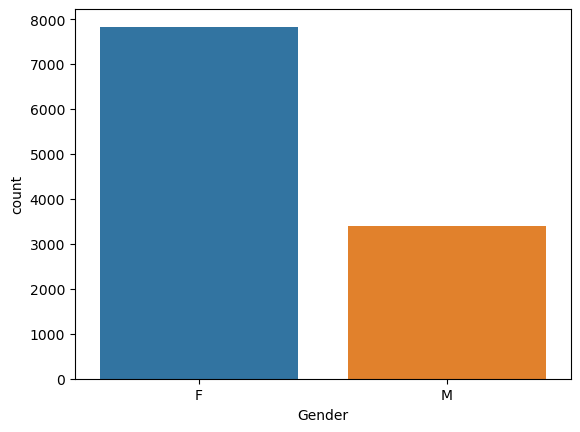

In [46]:
ax=sns.countplot(x='Gender',data=sales)

<Axes: xlabel='Gender'>

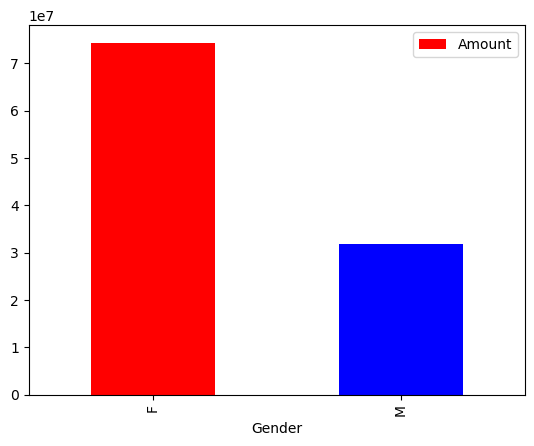

In [47]:
sales.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).plot.bar(x='Gender',y='Amount',color=['red','blue'])

In [49]:
##From above graph we can see that most of the buyers are females

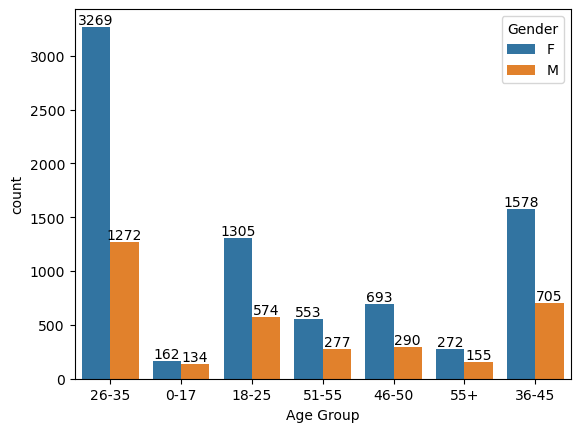

In [54]:
#Age Group
ax=sns.countplot(data=sales,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

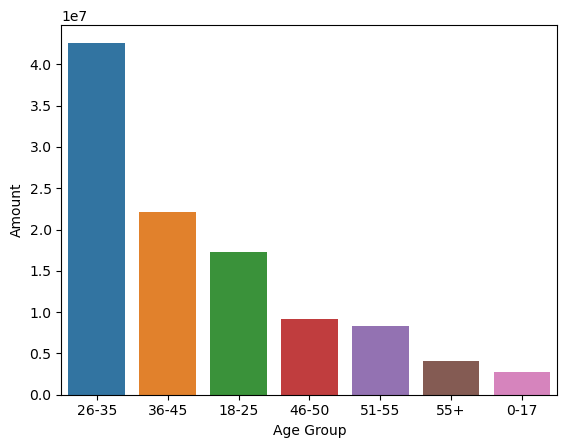

In [58]:
#total amount vs age group
sales_age= sales.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

In [ ]:
#from above graph we can see that most of the buyers are of age group between 26-35 yrs female

<Axes: xlabel='State', ylabel='Orders'>

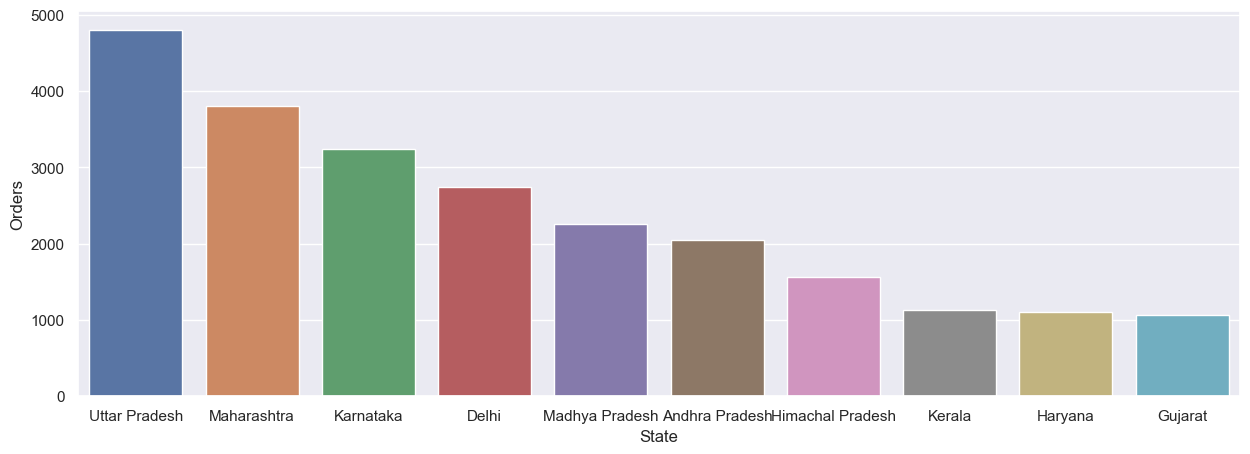

In [74]:
#total number of orders from top 10 states
sales_state=sales.groupby(['State'],as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

In [ ]:
#total amount vs #total sales

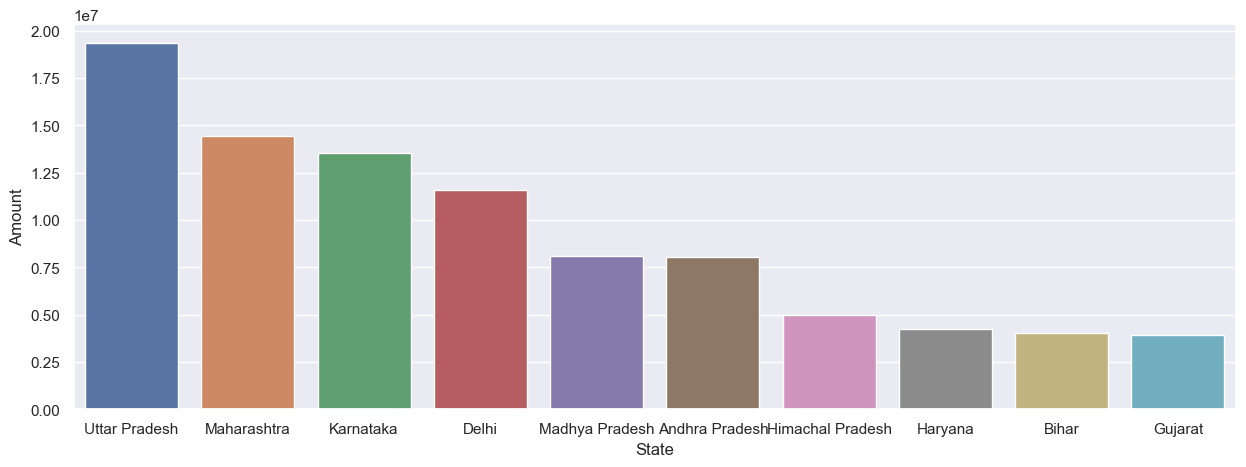

In [98]:
sales_state=sales.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(data=sales_state,x='State',y='Amount')
sns.set(rc={'figure.figsize':(15,5)})

In [ ]:
#from above graphs we can see that the orders & total sale/amount are from Uttar Pradesh, Maharashtra and Karnatka respectively

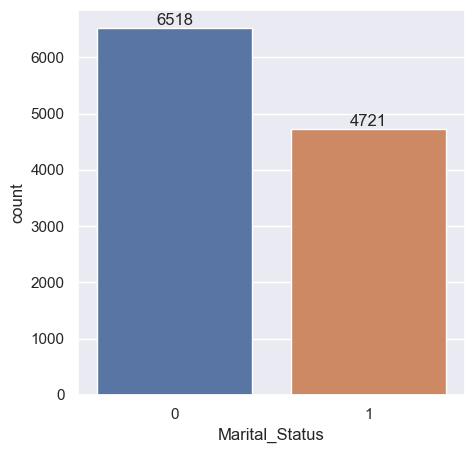

In [110]:
#Marital Status
ax= sns.countplot(data=sales,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc={'figure.figsize':(7,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

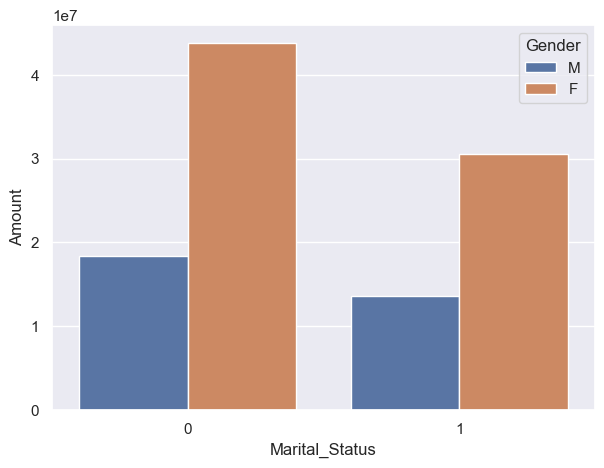

In [116]:
sales_state = sales.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=True)
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

In [ ]:
#From above graph we can say that most of the buyers are married women

In [ ]:
#Occupation

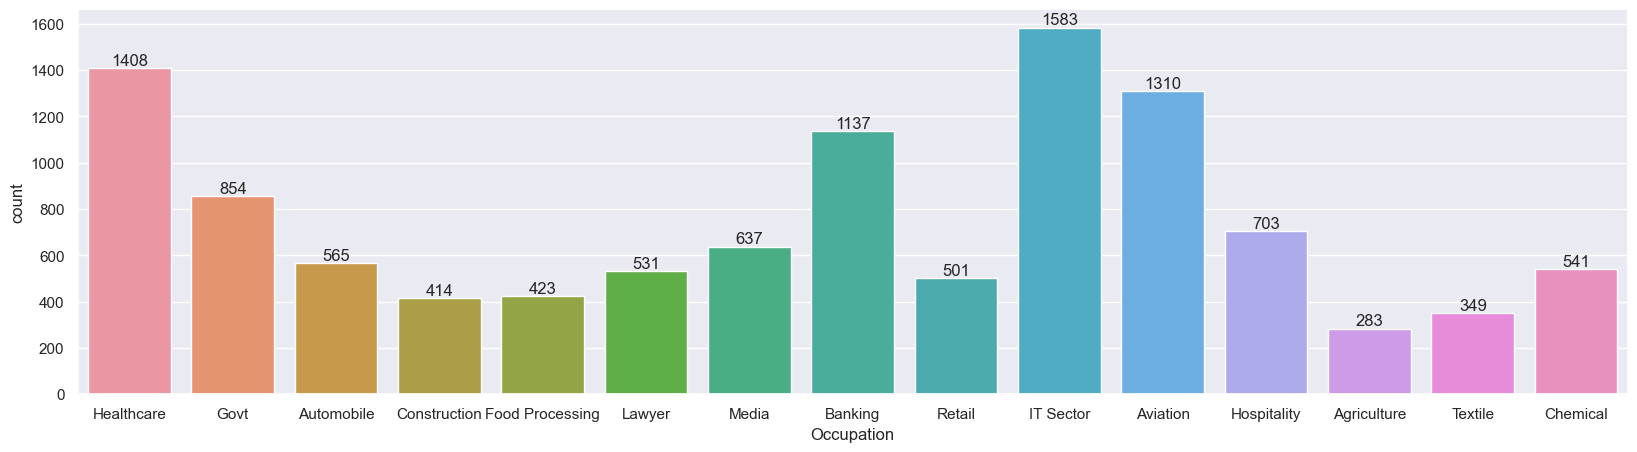

In [128]:
ax=sns.countplot(data=sales,x='Occupation')
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

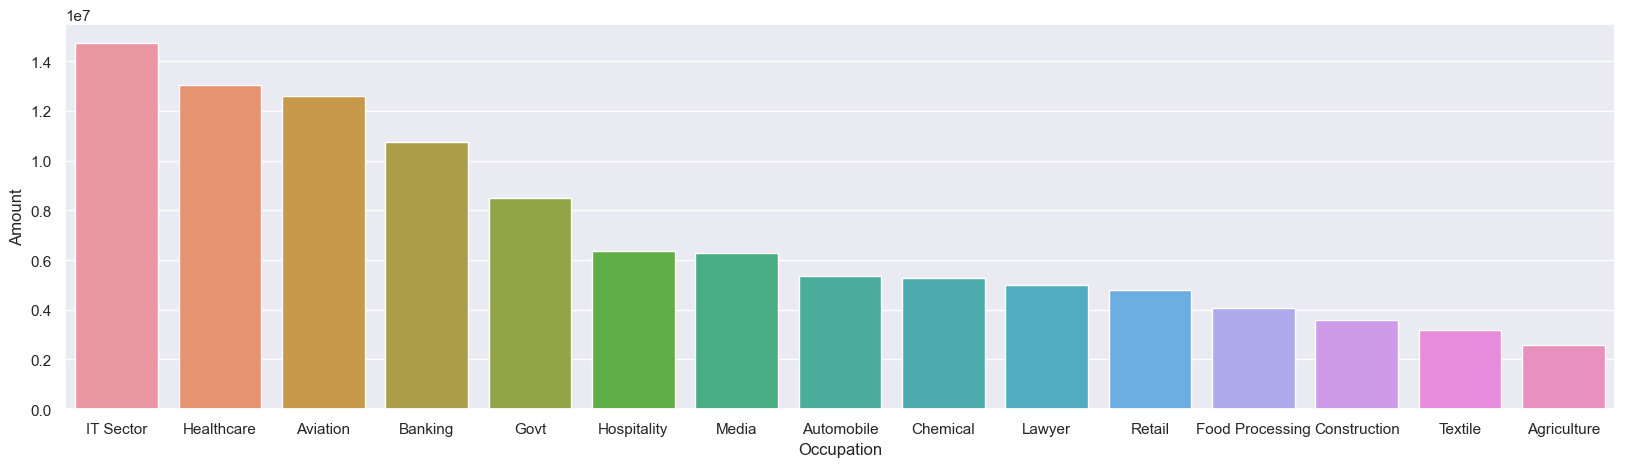

In [132]:
sales_state=sales.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(data=sales_state,x='Occupation',y='Amount')

In [ ]:
#from above graph we can see that most of the buyers are working in IT,Healthcare and Aviation.

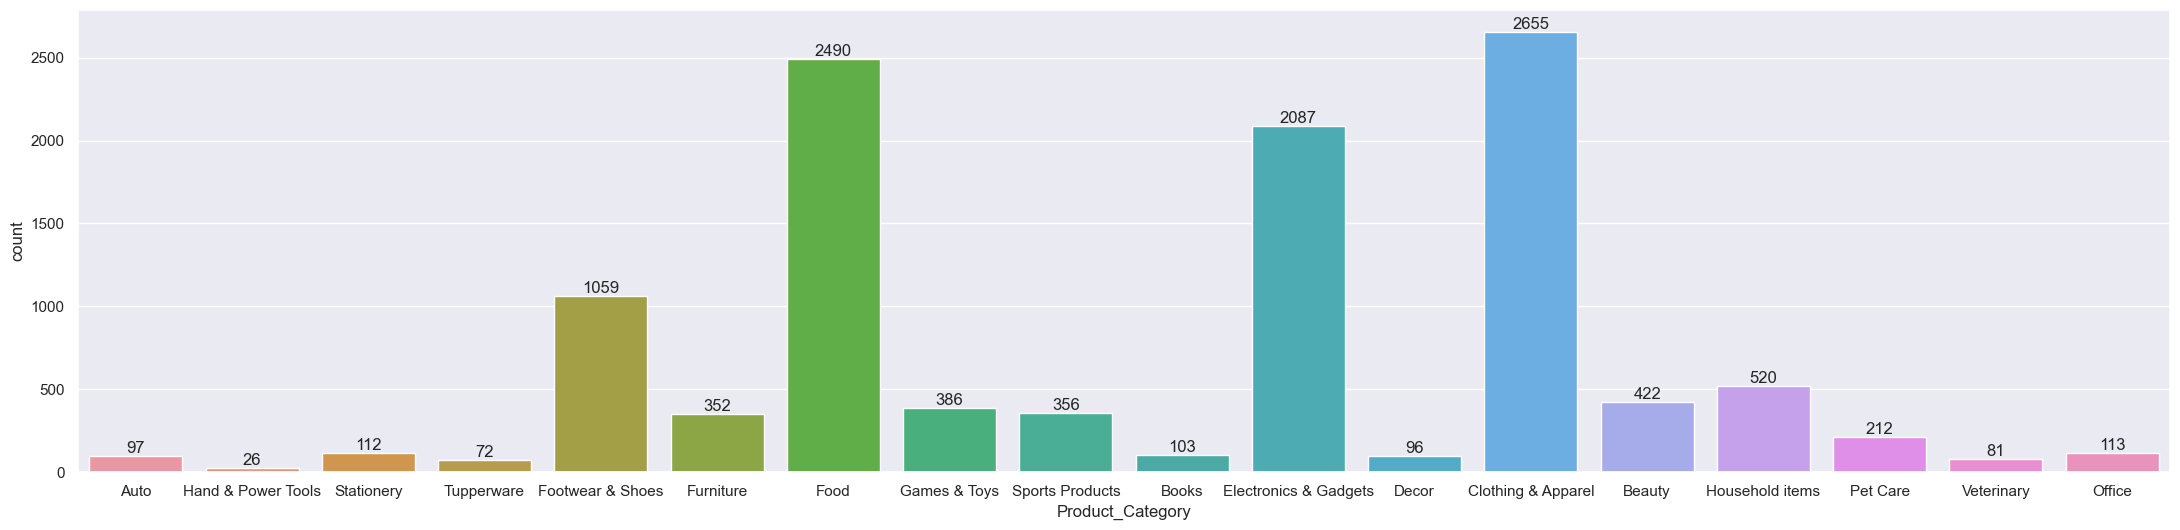

In [142]:
#Product Category
ax=sns.countplot(data=sales,x='Product_Category')
sns.set(rc={'figure.figsize':(25,6)})
for bars in  ax.containers:
    ax.bar_label(bars)

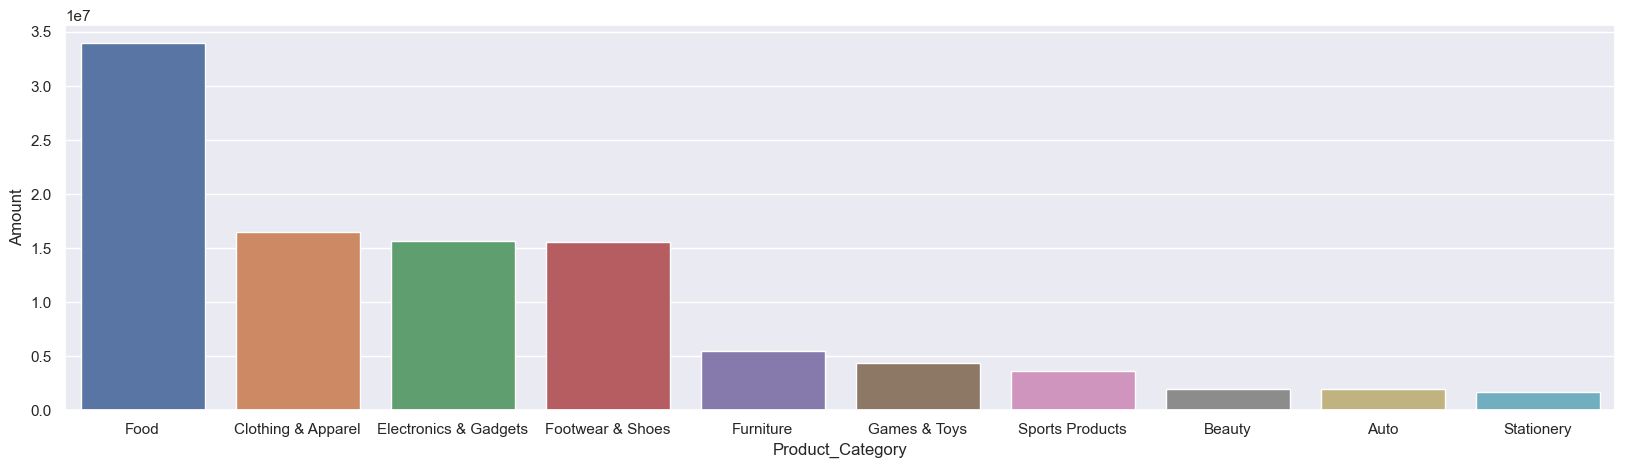

In [161]:
sales_state=sales.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(data=sales_state,x='Product_Category',y='Amount')
sns.set(rc={'figure.figsize':(20,5)})

In [ ]:
#from above graphs we can see that most of the products sold are from Foods, Clothing and Electronics.

<Axes: xlabel='Product_ID', ylabel='Amount'>

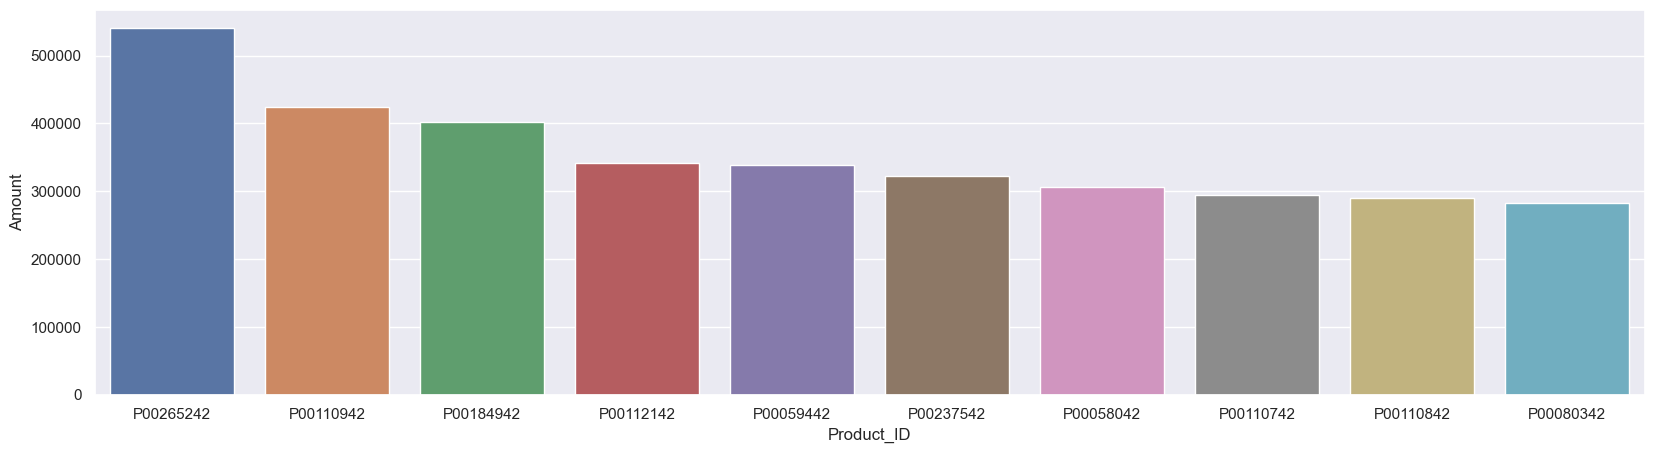

In [166]:
#top selling products
sales_state=sales.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(data=sales_state,x='Product_ID',y='Amount')

In [ ]:
#Conclusion:

In [ ]:
#Married womes from age group between 26-35 year belonging to UP,Maharastra, Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food,clothing and electronics